In [1]:
#ST

In [11]:
#!pip install pandas openpyxl scipy
!pip install matplotlib seaborn

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
#import
file_path = 'ArquivoST.xlsx'
data = pd.read_excel(file_path)

data

,Dia,Hora,Valor,Cartão,CBK
0,2015-05-01,00:01:54,36.54,536518******2108,Não
1,2015-05-01,00:03:46,36.54,536518******2108,Não
2,2015-05-01,00:08:50,69.00,453211******1239,Não
3,2015-05-01,00:27:00,193.43,548827******1705,Não
4,2015-05-01,01:32:46,132.00,531681******9778,Não
...,...,...,...,...,...
11123,2015-05-30,23:07:01,53.00,514868******7409,Não
11124,2015-05-30,23:08:47,15.00,439354******5281,Não
11125,2015-05-30,23:15:24,20.00,549167******1648,Não
11126,2015-05-30,23:17:41,70.00,518759******8384,Não


In [3]:
# Estatísticas Básicas
valor_stats = {
    'Média': np.mean(data['Valor']),
    'Mediana': np.median(data['Valor']),
    'Desvio Padrão': np.std(data['Valor'], ddof=1),  # ddof=1 para amostral
}

In [4]:

# intervalo de confiança (95%)
conf_interval = stats.t.interval(0.95, len(data['Valor'])-1, loc=np.mean(data['Valor']), scale=stats.sem(data['Valor']))
valor_stats['Intervalo de Confiança (95%)'] = conf_interval


print("Estatísticas Básicas para a coluna 'Valor':")
for stat_name, stat_value in valor_stats.items():
    if isinstance(stat_value, tuple):
        # Para intervalo de confiança, exibir cada limite
        print(f"{stat_name}: ({stat_value[0]:.2f}, {stat_value[1]:.2f})")
    else:
        print(f"{stat_name}: {stat_value:.2f}")


total_transacoes = len(data)
total_chargebacks = len(data[data['CBK'] == 'Sim'])


print("\nContagem de Transações:")
print(f"Total de Transações: {total_transacoes}")
print(f"Total de Chargebacks: {total_chargebacks}")

Estatísticas Básicas para a coluna 'Valor':
Média: 129.55
Mediana: 99.00
Desvio Padrão: 141.42
Intervalo de Confiança (95%): (126.92, 132.18)

Contagem de Transações:
Total de Transações: 11128
Total de Chargebacks: 572


In [10]:
(total_chargebacks/total_transacoes)*100

5.14018691588785

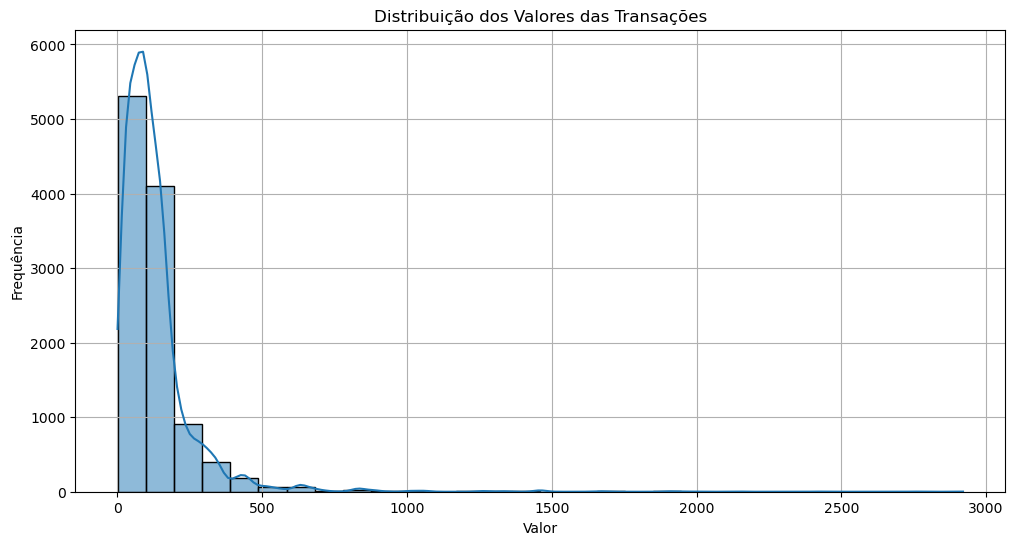

In [5]:

data['Dia'] = pd.to_datetime(data['Dia'])

#  Histogramas
plt.figure(figsize=(12, 6))
sns.histplot(data['Valor'], bins=30, kde=True)
plt.title('Distribuição dos Valores das Transações')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.grid()
plt.show()

/opt/conda/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1244: UserWarning: Attempting to set identical left == right == 544.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


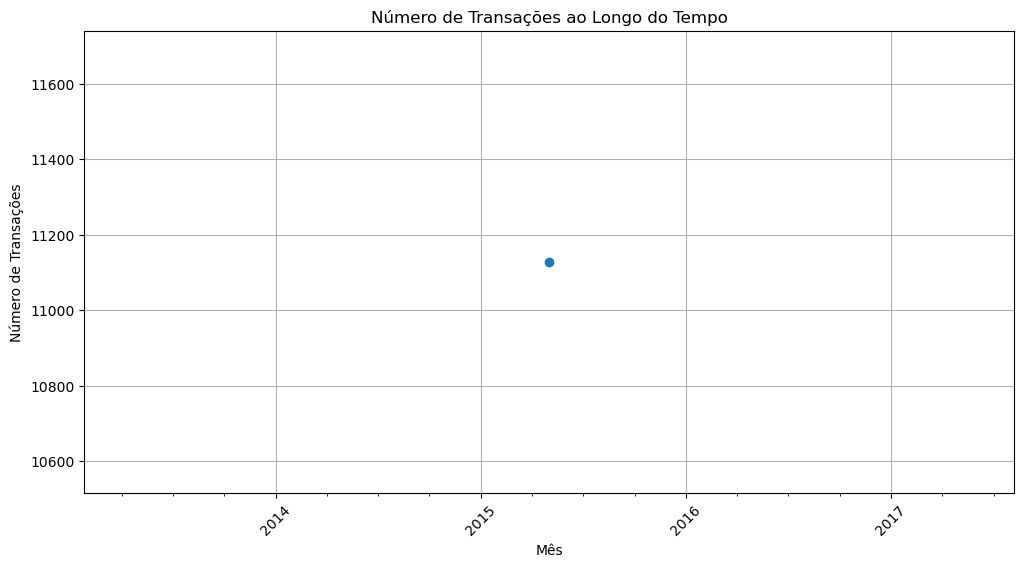

In [7]:

data['Dia'] = data['Dia'].dt.to_period('D')
transacoes_por_mes = data.groupby('Mês').size()

plt.figure(figsize=(12, 6))
transacoes_por_mes.plot(kind='line', marker='o')
plt.title('Número de Transações ao Longo do Tempo')
plt.xlabel('Mês')
plt.ylabel('Número de Transações')
plt.xticks(rotation=45)
plt.grid()
plt.show()

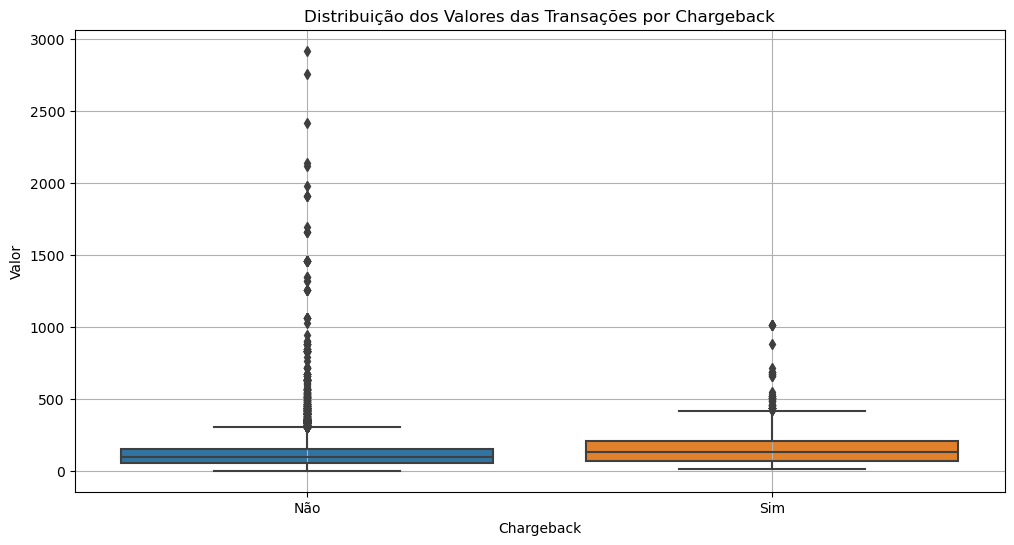

In [29]:
# Boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(x='CBK', y='Valor', data=data)
plt.title('Distribuição dos Valores das Transações por Chargeback')
plt.xlabel('Chargeback')
plt.ylabel('Valor')
plt.grid()
plt.show()

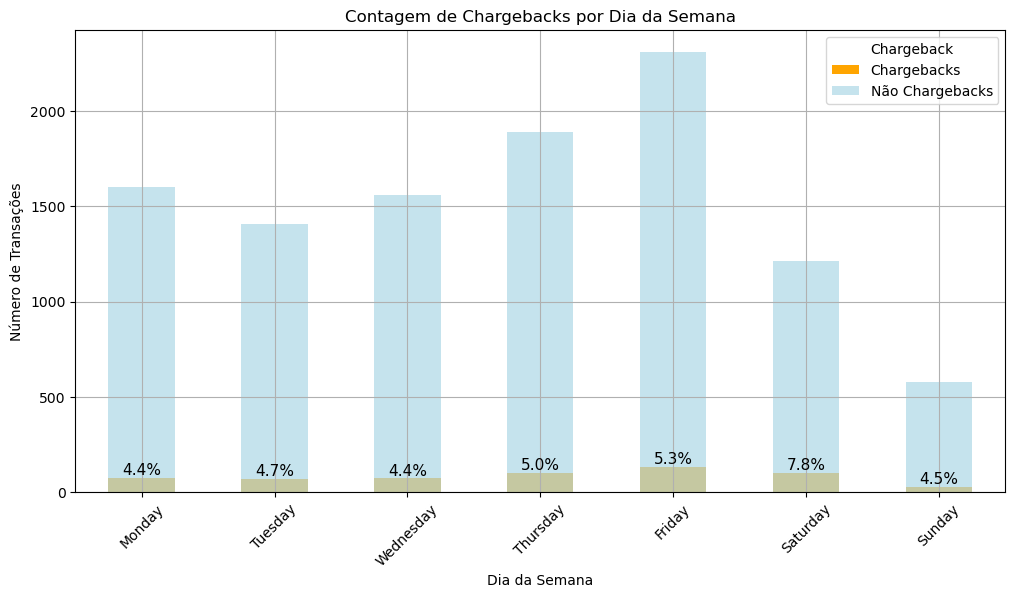

In [12]:
data['Dia da Semana'] = data['Dia'].dt.day_name()

# chargebacks por dia da semana
contagem_chargebacks_dia = data.groupby('Dia da Semana')['CBK'].value_counts().unstack().fillna(0)

# Reorganizando
dias_da_semana = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
contagem_chargebacks_dia = contagem_chargebacks_dia.reindex(dias_da_semana)

# Barras
plt.figure(figsize=(12, 6))
bars_chargebacks = contagem_chargebacks_dia['Sim'].plot(kind='bar', color='orange', label='Chargebacks')
bars_nao_chargebacks = contagem_chargebacks_dia['Não'].plot(kind='bar', color='lightblue', label='Não Chargebacks', alpha=0.7)

plt.title('Contagem de Chargebacks por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Número de Transações')
plt.xticks(rotation=45)
plt.legend(title='Chargeback')
plt.grid()


for i in range(len(contagem_chargebacks_dia)):
    total_transacoes = contagem_chargebacks_dia.iloc[i, :].sum()
    if total_transacoes > 0:  # Para evitar divisão por zero
        percentual_chargeback = (contagem_chargebacks_dia['Sim'].iloc[i] / total_transacoes) * 100
        plt.text(i, contagem_chargebacks_dia['Sim'].iloc[i] + 0.5, f'{percentual_chargeback:.1f}%', 
                 ha='center', va='bottom', fontsize=11, color='black')

plt.show()

/tmp/ipykernel_75/648784913.py:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data['Data_Hora'] = data.apply(lambda row: pd.datetime.combine(row['Dia'], row['Hora']), axis=1)


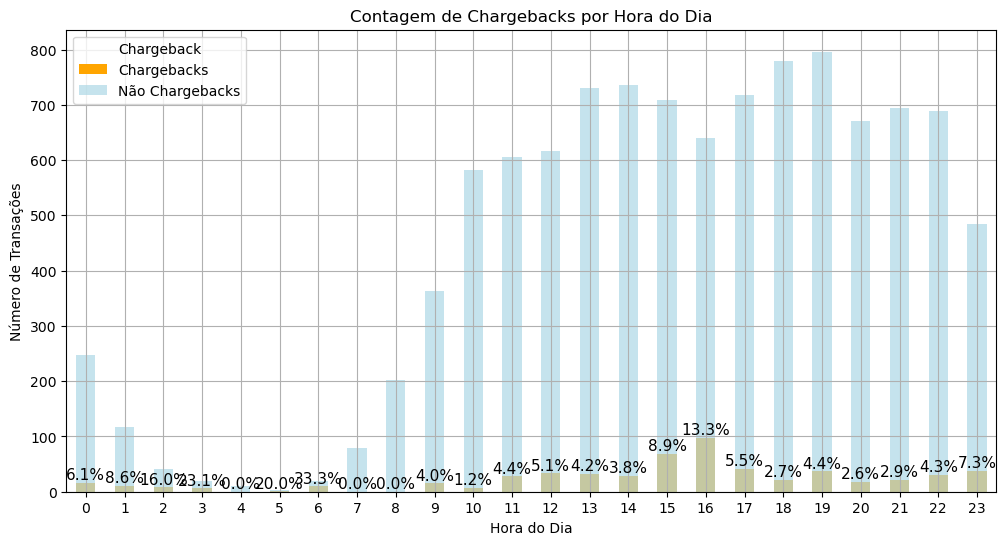

In [26]:
#data['Dia'] = pd.to_datetime(data['Dia'], format='%d/%m/%Y')


data['Hora'] = pd.to_datetime(data['Hora'], format='%H:%M:%S').dt.time  # Mantenha apenas a parte da hora


data['Data_Hora'] = data.apply(lambda row: pd.datetime.combine(row['Dia'], row['Hora']), axis=1)


data['Hora'] = data['Data_Hora'].dt.hour

# chargebacks por hora
contagem_chargebacks_hora = data.groupby('Hora')['CBK'].value_counts().unstack().fillna(0)


plt.figure(figsize=(12, 6))
bars_chargebacks = contagem_chargebacks_hora['Sim'].plot(kind='bar', color='orange', label='Chargebacks')
bars_nao_chargebacks = contagem_chargebacks_hora['Não'].plot(kind='bar', color='lightblue', label='Não Chargebacks', alpha=0.7)

plt.title('Contagem de Chargebacks por Hora do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Número de Transações')
plt.xticks(rotation=0)
plt.legend(title='Chargeback')
plt.grid()

for i in range(len(contagem_chargebacks_hora)):
    total_transacoes = contagem_chargebacks_hora.iloc[i, :].sum()
    if total_transacoes > 0:  # Para evitar divisão por zero
        percentual_chargeback = (contagem_chargebacks_hora['Sim'].iloc[i] / total_transacoes) * 100
        plt.text(i, contagem_chargebacks_hora['Sim'].iloc[i] + 0.5, f'{percentual_chargeback:.1f}%',
                 ha='center', va='bottom', fontsize=11, color='black')

plt.show()

In [32]:
transacoes_por_cartao = data.groupby('Cartão').agg(
    Total_Transacoes=('Valor', 'size'),
    Total_Chargebacks=('CBK', lambda x: (x == 'Sim').sum())
).reset_index()

transacoes_por_cartao['Porcentagem_Chargeback'] = (transacoes_por_cartao['Total_Chargebacks'] / transacoes_por_cartao['Total_Transacoes']) * 100

print("Transações por Cartão:")
print(transacoes_por_cartao.sort_values(by='Total_Transacoes', ascending=False))

total_transacoes = len(data)
total_chargebacks = len(data[data['CBK'] == 'Sim'])
taxa_chargeback = (total_chargebacks / total_transacoes) * 100

print(f"\nTaxa de Chargeback: {taxa_chargeback:.2f}%")

valor_medio_chargeback = data[data['CBK'] == 'Sim']['Valor'].mean()
valor_medio_sem_chargeback = data[data['CBK'] == 'Não']['Valor'].mean()

print(f"\nValor Médio de Transação com Chargeback: {valor_medio_chargeback:.2f}")
print(f"Valor Médio de Transação sem Chargeback: {valor_medio_sem_chargeback:.2f}")

Transações por Cartão:
                Cartão  Total_Transacoes  Total_Chargebacks  \
8919  552289******7788                20                 20   
5750  521397******2711                20                 20   
7863  544828******8377                15                 15   
12    400217******7228                12                 12   
4311  498407******2077                12                 12   
...                ...               ...                ...   
3316  482447******2695                 1                  0   
3315  482447******2067                 1                  0   
3314  482447******1887                 1                  0   
3313  482425******9108                 1                  0   
9259  558285******7261                 1                  0   

      Porcentagem_Chargeback  
8919                   100.0  
5750                   100.0  
7863                   100.0  
12                     100.0  
4311                   100.0  
...                      ...  
331

In [8]:
transacoes_por_cartao = data.groupby('Cartão').agg(
    Total_Transacoes=('Valor', 'size'),
    Total_Chargebacks=('CBK', lambda x: (x == 'Sim').sum())
).reset_index()

transacoes_por_cartao['Porcentagem_Chargeback'] = (transacoes_por_cartao['Total_Chargebacks'] / transacoes_por_cartao['Total_Transacoes']) * 100

cartoes_com_chargeback = transacoes_por_cartao.sort_values(by='Porcentagem_Chargeback', ascending=False)

print("Transações por Cartão (ordenado por percentual de chargeback):")
print(cartoes_com_chargeback)

output_file_path = 'cartoes_com_maior_percentual_chargeback.csv'  # Ajuste o caminho para onde deseja salvar
cartoes_com_chargeback.to_csv(output_file_path, index=False)

print(f"\nLista de cartões exportada com sucesso para '{output_file_path}'")

Transações por Cartão (ordenado por percentual de chargeback):
                Cartão  Total_Transacoes  Total_Chargebacks  \
129   401370******9822                 4                  4   
6438  527497******7595                 4                  4   
7802  544731******8804                 3                  3   
147   403217******5156                 2                  2   
2504  453211******6881                 1                  1   
...                ...               ...                ...   
3105  464294******5849                 1                  0   
3104  464294******4224                 1                  0   
3103  463312******9338                 1                  0   
3102  463312******9278                 1                  0   
9259  558285******7261                 1                  0   

      Porcentagem_Chargeback  
129                    100.0  
6438                   100.0  
7802                   100.0  
147                    100.0  
2504                   10